## Prevenção do suicídio usando causalidade em aprendizado de máquina
O aumento alarmante do numero de pessoas afetadas por doenças mentais tornou-se um dos principais problemas de saúde pública enfrentado pelos governos em todo o mundo.
O suicídio esta entre as 20 causas de morte mais comuns segundo avaliação da Organização Mundial da Saúde (Organization et al., 2019), superando malaria, câncer de mama
ou homicídio e nos últimos 20 anos, houve um aumento de 24% dos casos.
Utilizamos dados de classificação clínica e identificamos os possíveis fatores causais que possam estabelecer relações com a ideação suicida.
Para tanto, utilizamos métodos de inferência causal e aprendizado de maquina.

Os fatores utilizados para inferência causal foram: Sexo, Estado Civil, Tipo de Residência, Alcoólatra, Droga, Suicídio na Família, Depressão na Família,
Alcoólatra Família, Droga na Família, Neuro, Psiquiátrica, Capaz de desfrutar das coisas, Impacto de sua Família e amigos, Capaz de tomar decisões importantes,
Estudante, Insônia, Ansiedade, Perda de insights, Apetite, Perda de Peso, Ansiedade somática, Hipocondriase, Sentimento de Culpa, Trabalho e interesses,
Energia, Lentidão pensamento e fala, Agitação, Libido, TOC e idade.

Após nossa pesquisa, os fatores que se apresentaram como possíveis causas que levam um indivíduo a ter ideação suicida foram: Suicídio na família, Drogas na família,
Capaz de tomar decisões importantes, Estudante, Hipocondriase, Sentimentos de culpa, Trabalho e interesses e Energia.

O objetivo desse projeto é fazer simulações contrafctuais para obter os possíveis fatores que influenciam determinado indivíduo a ter ideação suicida.
De posse dele, os profissionais da área de saúde que atendem pacientes com ideação suicida, poderão trabalhar com os mesmos de forma mais assertiva objetivando atenuar ou até eliminar
tal ideação.

Passos para execução:
                                                   
1) Preencha a planilha data_base.csv com os dados dos pacientes de acordo com os parâmetros:
   
	  > Suicídio na família: Entre com 1 para Sim e 0 para não.
	     
	  > Capaz de tomar decisões importantes: Entre com um número de 1 a 5, sendo: 1=Concordo totalmente; 2=Concordo; 3=Neutro; 4=Discordo;
		5=Discordo totalmente.
   
	  > Estudante: Entre com um número de 0 a 1, sendo: 0=Não; 1=Sim; 0.5=Meio período.
   
	  > Hipocondriase: Entre com um número de 0 a 4, sendo: 0=Ausente; 1=Leve 2=Moderado; 3=Moderadamente grave;
		4=Grave.
   
	  > Sentimentos de culpa: Entre com um número de 0 a 4, sendo: 0=Ausente, 1=Duvidoso ou trivial: Autocensura, sente que decepcionou as
		pessoas	2=Leve: Idéias de culpa ou ruminação sobre erros passados ou atos pecaminosos; 3=Moderado: A doença atual é uma punição.
		Delírios de culpa	4=Grave: Ouve vozes acusatórias ou denunciatórias e/ou experimenta alucinações visuais ameaçadoras.
   
	  > Trabalho e interesses: Entre com um número de 0 a 4, sendo:0=Ausente: Sem dificuldade; 1=Duvidoso ou trivial: Pensamentos e
		sentimentos de incapacidade, cansaço ou fraqueza relacionados às atividades; trabalho ou hobbies; 2=Leve: Perda de interesse pela
		atividade; hobbies	ou trabalho – relatados diretamente pelo paciente, ou indiretos em apatia, indecisão e vacilação
		(sente que precisa se esforçar para
		trabalhar ou realizar atividades); 3=Moderado: Diminuição do tempo real gasto nas atividades ou diminuição da produtividade; 4=Grave:
		Deixou de trabalhar por doença atual.
   
	  > Depressão na familia:  Entre com 1 para Sim e 0 para não.
   
      > Histórico de uso de álcool na familia:  Entre com 1 para Sim e 0 para não.
   
      > Capaz de desfrutar das coisas: Entre com um número de 1 a 5, sendo: 1=Concordo totalmente; 2=Concordo; 3=Neutro; 4=Discordo;
		5=Discordo totalmente.

	  > Uso de drogas: Entre com um número de 0 a 2, sendo: 0=Nenhum verificado; 1=Abuso; 2=Dependente.
   
	  > Suicidio: Entre com um número de 0 a 4, sendo: : 0=Ausente; 1=Sente que a vida está vazia; 2=Desejos de morte;
		3=Pensamentos suicidas ativos; 4=Tentativa grave de suicídio.
   
	  > Ansiedade: Entre com um número de 0 a 4, sendo: 0=Ausente: Sem dificuldade 1=Duvidoso ou trivial:
		Tensão subjetiva e irritabilidade;
		2=Leve: Preocupação com assuntos menores; 3=Moderado: Atitude apreensiva aparente na face ou na fala;
		4=Grave: Medos expressos sem questionamento.

2) Faça o upload dos arquivos data.csv e data_base.csv acessando o ícone Arquivos no menu do canto esquerdo, navegando até a pasta que contenha os arquivos. Selecione ambos e clique em abrir ignorando o aviso.

3) Acesse o menu Ambiente de execução/Executar tudo

4) Após alguns minutos será gerado o arquivo data_final com o nível de ideação suicida predito e com os fatores que refletiram alterações no nível de ideação suicida após alguma mudança. Acesse o ícone Arquivos no menu do canto esquerdo, clique com o botão direito no arquivo data_final e selecione Fazer download. O arquivo será salvo na pasta download do seu computador.

Obs: A alteração do valor do nível de ideação suicida em alguma simulação, pode significar que o indíviduo é sensível ao fator da simulação em questão.
O valor da coluna ID da planilha data_final corresponde ao número da linha que determinado indíviduo está localizado no arquivo data_base.


In [1]:
#Importando bibliotecas
import torch
import pandas as pd
import numpy as np

# Importando dataset utils
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

import importlib
if importlib.util.find_spec('ipywidgets') is not None:
    from tqdm.auto import tqdm
else:
    from tqdm import tqdm

import networkx as nx

from typing import Union

In [2]:
dataframe = pd.read_csv('/content/data.csv', sep=';')

dataframe = dataframe.fillna(-1)
df_suic = dataframe.copy()
df_suic = df_suic.astype(float)

In [3]:
df_base = pd.read_csv('/content/data_base.csv', sep=';',decimal=',',encoding='unicode_escape')
df_base = df_base.astype(float)

In [4]:
notears_selected = [
   "Suic_familia",
    "Capaz de tomar decisões importantes",
    "Estudante",
    "Hipocondriase",
    "Sentimentos_culpa",
    "Trabalho e interesses",
    'Dep_familia',
    'Alc_familia',
    'Capaz de desfrutar das coisas',
    'Droga',
    'Suicidio',
    'Ansiedade'
     ]

# Lendo dados

In [5]:
df_novo = df_base.copy()
df_novo['Id'] = df_novo.index+2

In [6]:
df_suic['Id'] = range(df_novo['Id'].max()+1, (df_suic.shape[0]+df_novo.shape[0])+2)

# Criando conjunto de dados causal

In [7]:
# Conjunto de dados de X
class CausalDataset(Dataset):
    def __init__(self, X, target:Union[list, int]):
        torch.manual_seed(3)
        self.X = torch.tensor(X, dtype=torch.double)
        self.target = target
        if isinstance(target, int):
            self.target = [target]

        # X é toda variável, exceto a lista de alvos
        dims = list(range(self.X.shape[1]))
        self.x = self.X[:, [i for i in dims if i not in self.target]]
        self.y = self.X[:, self.target]

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx].double(), self.y[idx].double()

In [8]:
class MLP(torch.nn.Module):
    def __init__(self, dim_list:list, add_dropout:bool=False):
        super(MLP, self).__init__()
        torch.manual_seed(3)
        self.layers = torch.nn.ModuleList()
        for i in range(len(dim_list) - 2):
            self.layers.append(torch.nn.Linear(dim_list[i], dim_list[i+1]))
            self.layers.append(torch.nn.ReLU())
            if add_dropout:
                self.layers.append(torch.nn.Dropout(0.3))

        self.layers.append(torch.nn.Linear(dim_list[-2], dim_list[-1]))
        self.double()

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Pipeline de treino do modelo

In [9]:
def trainPipeline(dataset, model, batch_size=64, train_split=0.8, verbose=True, max_epochs=100, patience=10, lr=0.001, weight_decay=0.0, loss_fn=nn.MSELoss()):
    torch.manual_seed(3)
    train_size = int(train_split * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    criterion = loss_fn
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    patience = patience

    train_losses = []
    test_losses = []
    for epoch in tqdm(range(max_epochs)):
        train_loss = 0
        model.train()
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        test_loss = 0
        model.eval()
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                loss = criterion(output, target)
                test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        if verbose:
            print(f"Epoch {epoch} - Train loss: {train_loss} - Test loss: {test_loss}")

        if epoch > 10:
            all_patience = test_losses[-patience:]
            test_loss = test_losses[-1]
            if all([test_loss > x for x in all_patience]):
                print("Early stopping")
                break

    # teste do modelo no conjunto de teste e cálculo da precisão
    model.eval()
    with torch.no_grad():
        y_pred_test = []
        y_true_test = []
        y_pred_train = []
        y_true_train = []

        for data, target in train_loader:
            output = model(data)
            y_pred_train.append(output)
            y_true_train.append(target)
        for data, target in test_loader:
            output = model(data)
            y_pred_test.append(output)
            y_true_test.append(target)

        y_pred_test = torch.cat(y_pred_test, dim=0)
        y_true_test = torch.cat(y_true_test, dim=0)
        y_pred_train = torch.cat(y_pred_train, dim=0)
        y_true_train = torch.cat(y_true_train, dim=0)

        train_error = torch.abs(y_pred_train - y_true_train)
        test_error = torch.abs(y_pred_test - y_true_test)

        # calculando acurácia para cada alvo
        test_accuracy = []
        train_accuracy = []
        for i in range(len(y_true_test[0])):
            test_accuracy.append(torch.sum(test_error[:, i] < 0.5) / len(test_error))
            train_accuracy.append(torch.sum(train_error[:, i] < 0.5) / len(train_error))

        print(f"Final Train accuracy: {train_accuracy}")
        print(f"Final Test accuracy: {test_accuracy}")

    metrics = {
        "train_loss": train_losses,
        "test_loss": test_losses,
        "train_error": train_error,
        "test_error": test_error,
        "test_accuracy": test_accuracy
    }

    return model, metrics



## Primeiro treinamos um modelo para cada alvo e obtemos o valor dos erros (individualidade)

## Agora adicionamos os erros ao conjunto de dados e treinamos o modelo contrafactual

In [10]:
# Criando o modelo counterfactual

class CounterfactualModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CounterfactualModel, self).__init__()
        self.individuality_model = MLP([input_size, hidden_size, hidden_size, hidden_size, 1], add_dropout=True)
        self.counterfactual_model = MLP([input_size+1, hidden_size, hidden_size, hidden_size, output_size], add_dropout=True)

    def individuality(self, x):
        return self.individuality_model(x)

    def counterfactual(self, x, i):
        x = torch.cat([x, i], dim=1)
        return self.counterfactual_model(x)

    def forward(self, x):
        i = self.individuality(x)
        y = self.counterfactual(x, i)
        return y

# Treinando o modelo com fatores selecionados na inferência causal

In [11]:
df_suic_notears = df_suic.copy()
df_suic_notears=pd.concat([df_novo,df_suic_notears], ignore_index=True)
df_suic_notears = df_suic_notears[notears_selected]

# Criando modelos para cada alvo
targets = ["Suicidio", "Ansiedade"]
targets_idx = [df_suic_notears.columns.get_loc(c) for c in targets]

# Criando base de dados
notears_suic_dataset = CausalDataset(df_suic_notears.values, targets_idx[0])
notears_anx_dataset = CausalDataset(df_suic_notears.values, targets_idx[1])
sample_x, sample_y = notears_suic_dataset[0]

# Agora prevemos os alvos com um MLP (Perceptron multicamadas)
suic_causal_model = MLP([sample_x.shape[0], 64, 64, 64, 1], add_dropout=True)
anx_causal_model = MLP([sample_x.shape[0], 64, 64, 64, 1], add_dropout=True)

suic_causal_model, suic_causal_metrics = trainPipeline(notears_suic_dataset, suic_causal_model, verbose=False, max_epochs=1000, weight_decay=1e-5)
anx_causal_model, anx_causal_metrics = trainPipeline(notears_anx_dataset, anx_causal_model, verbose=False, max_epochs=1000, weight_decay=1e-5)



  0%|          | 0/1000 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.4818)]
Final Test accuracy: [tensor(0.4020)]


  0%|          | 0/1000 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.5361)]
Final Test accuracy: [tensor(0.4735)]


In [12]:
# calculando individualidade
suic_causal_erros = []
anx_causal_erros = []
with torch.no_grad():
    for data, y_true in notears_suic_dataset:
        y_pred = suic_causal_model(data)
        error = torch.abs(y_pred - y_true).item()
        suic_causal_erros.append(error)
    for data, y_true in notears_anx_dataset:
        y_pred = anx_causal_model(data)
        error = torch.abs(y_pred - y_true).item()
        anx_causal_erros.append(error)

suic_causal_erros = np.array(suic_causal_erros)
anx_causal_erros = np.array(anx_causal_erros)

# adicionando individualidade no dataframe
df_suic_notears_with_errors = df_suic_notears.copy()
df_suic_notears_with_errors["Suicidio_error"] = suic_causal_erros
df_suic_notears_with_errors["Ansiedade_error"] = anx_causal_erros

# criando dataset causal com individualidade
targets_idx = [df_suic_notears_with_errors.columns.get_loc(c) for c in targets]
notears_causal_dataset_error = CausalDataset(df_suic_notears_with_errors.values, targets_idx)
sample_x, sample_y = notears_causal_dataset_error[0]

# criando modelo counterfactual
causal_cf_model = CounterfactualModel(sample_x.shape[0], 64, sample_y.shape[0])

# treinando modelo counterfactual
causal_cf_model, causal_cf_metrics = trainPipeline(notears_causal_dataset_error, causal_cf_model, verbose=False, max_epochs=1000, weight_decay=1e-5)


  0%|          | 0/1000 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.8461), tensor(0.8229)]
Final Test accuracy: [tensor(0.7768), tensor(0.7571)]


In [13]:
targets = ["Suicidio", "Ansiedade"]
df = df_suic_notears_with_errors

# carregando o modelo
counterfact = causal_cf_model
counterfact = counterfact.eval()

# Simulações contrafactuais



In [14]:
def contrafact(df,coluna,i,len):
    df_1 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_cf'])
    df_2 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_cf'])
    dataset = CausalDataset(df.values, [df.columns.get_loc(c) for c in targets])

    if i >= len:
     idx=[i,0]
    else: idx=[i,i+1]

    data1, y1 = dataset[idx[0]]
    data2, y2 = dataset[idx[1]]

    # predict the counterfactuals for crossed individuals
    with torch.no_grad():
        i1 = counterfact.individuality(data1.unsqueeze(0))
        i2 = counterfact.individuality(data2.unsqueeze(0))

        cf11 = counterfact.counterfactual(data1.unsqueeze(0), i1)
        cf3 = cf11.squeeze(0).round().numpy().tolist()
        suic = cf3[0]

        if suic != df["Suicidio"][idx[0]]:
            df1_tmp = pd.DataFrame({'Id' : [idx[0]], 'Feature' : [coluna], 'Suicidio' : [df["Suicidio"][idx[0]]], 'Suicidio_cf' : [suic]})
            df_1=pd.concat([df_1, df1_tmp])

        else:
            df_2_tmp=pd.DataFrame({'Id' : [idx[0]], 'Feature' : [coluna], 'Suicidio' : [df["Suicidio"][idx[0]]], 'Suicidio_cf' : [suic]})
            df_2=pd.concat([df_2, df_2_tmp])

    return df_1, df_2

In [15]:
df_sim = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_cf'])
df_nao = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_cf'])
df1 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_cf'])
df2 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_cf'])
features = ["Suic_familia",
    "Capaz de tomar decisões importantes",
    "Estudante",
    "Hipocondriase",
    "Sentimentos_culpa",
    "Trabalho e interesses",
    'Dep_familia',
    'Alc_familia',
    'Capaz de desfrutar das coisas',
    'Droga']

feature1 = ['Suic_familia','Droga','Dep_familia', 'Alc_familia']
feature2 = ['Capaz de tomar decisões importantes','Capaz de desfrutar das coisas']
feature3 = ['Hipocondriase','Sentimentos_culpa', 'Trabalho e interesses']
feature4 = ['Estudante']
len = (df_suic.shape[0]+df_novo.shape[0])-1
df=df_suic_notears_with_errors

In [16]:
for index in df.index:
 for c in df[features]:
  if c in feature1:
   if df[c][index] == 0.0:
    df[c][index] = 1.0
   else:
    df[c][index] = 0.0
   df1,df2 = contrafact(df,c,index,len)
   if not df1.empty:
    df_sim = pd.concat([df_sim,df1])
   if not df2.empty:
    df_nao = pd.concat([df_nao,df2])

  if c in feature2:
   if np.any(df[c][index]==[-1.0,1.0,2.0,3.0]):
    df[c][index] = df[c][index] + 2
   else: df[c][index] = df[c][index] -2
   df1,df2 = contrafact(df,c,index,len)

   if not df1.empty:
    df_sim = pd.concat([df_sim,df1])
   if not df2.empty:
    df_nao = pd.concat([df_nao,df2])

  if c in feature3:
   if np.any(df[c][index]==[-1.0,1.0,2.0]):
    df[c][index] = df[c][index] + 2
   else: df[c][index] = df[c][index] -2
   df1,df2 = contrafact(df,c,index,len)

   if not df1.empty:
    df_sim = pd.concat([df_sim,df1])
   if not df2.empty:
    df_nao = pd.concat([df_nao,df2])

  if c in feature4:
   if df[c][index] == 0.0:
    df[c][index] = 1.0
   else:
    df[c][index] = 0.0
   df1,df2 = contrafact(df,c,index,len)

   if not df1.empty:
    df_sim = pd.concat([df_sim,df1])
   if not df2.empty:
    df_nao = pd.concat([df_nao,df2])

In [17]:
df_final = pd.merge(df_novo, df_sim, how = 'inner', on = 'Id')

In [18]:
df_final.rename(columns={'Suicidio_x': 'Suicidio'}, inplace=True)

In [19]:
df_final=df_final[['Id', 'Feature']]
df_final.to_excel('data_final.xlsx')

<Axes: xlabel='Feature'>

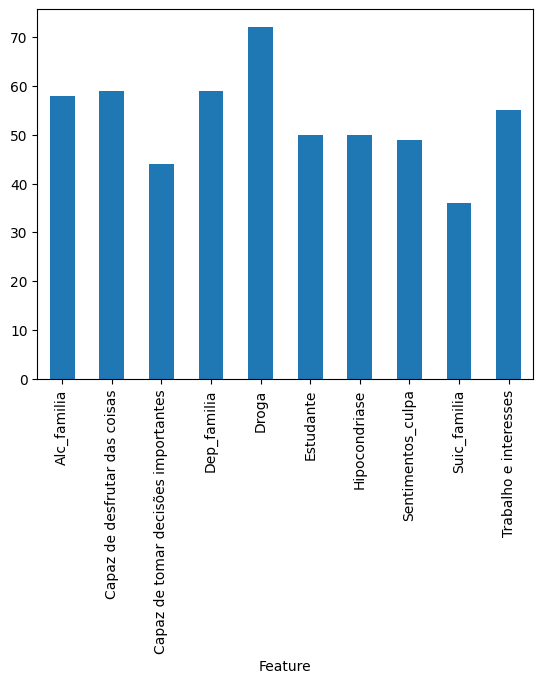

In [20]:
# Quantidade de pacientes que foram sensibilizados por cada fator
df_groups = df_final.groupby(['Feature'])['Id'].count()

df_groups.plot(kind='bar')